#Data Analisis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/scraping_FP.csv')
df.describe()

,score
count,1336.000000
mean,3.836826
std,1.586088
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df.describe()

,score
count,1336.000000
mean,3.836826
std,1.586088
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df.head()

,userName,score,at,content
0,Pengguna Google,1,2019-03-29 06:44:37,untuk console masih ngelag padahal saya udah p...
1,Pengguna Google,1,2019-03-29 06:44:37,untuk console masih ngelag padahal saya udah p...
2,Pengguna Google,5,2019-03-29 21:42:35,"bagus, bisa buat cheat pubg"
3,Pengguna Google,5,2019-03-29 21:42:35,"bagus, bisa buat cheat pubg"
4,Pengguna Google,5,2019-03-31 13:33:51,"ditambahin kalender akademik, news tentang ami..."


In [ ]:
df.shape

(1336, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  1336 non-null   object
 1   score     1336 non-null   int64 
 2   at        1336 non-null   object
 3   content   1336 non-null   object
dtypes: int64(1), object(3)
memory usage: 41.9+ KB


In [ ]:
df['score'].value_counts() #menghitung total masing2 score rating dengan skala 1-5

score
5    784
1    238
4    116
3    108
2     90
Name: count, dtype: int64

# Data Cleansing

In [ ]:
df.isnull().sum()

userName    0
score       0
at          0
content     0
dtype: int64

# Kolom Sentimen
Menambahkan kolom sentimen dengan kriteria, score 1-2 --> negatif dengan kode -1, score 3 adalah netral dengan kode angka 0 dan score 4-5 adalah positif dengan kode 1

In [ ]:
sentimen = []
for index, row in df.iterrows():
    if row['score'] > 3 :
        sentimen.append(1)
    elif row['score'] == 3:
        sentimen.append(0)
    else:
        sentimen.append(-1)
df['sentiment'] = sentimen
df.head()

,userName,score,at,content,sentiment
0,Pengguna Google,1,2019-03-29 06:44:37,untuk console masih ngelag padahal saya udah p...,-1
1,Pengguna Google,1,2019-03-29 06:44:37,untuk console masih ngelag padahal saya udah p...,-1
2,Pengguna Google,5,2019-03-29 21:42:35,"bagus, bisa buat cheat pubg",1
3,Pengguna Google,5,2019-03-29 21:42:35,"bagus, bisa buat cheat pubg",1
4,Pengguna Google,5,2019-03-31 13:33:51,"ditambahin kalender akademik, news tentang ami...",1


In [ ]:
import pandas as pd
import string
import nltk #import library natural languange toolkit

In [ ]:
#menghitung total masing2 nilai sentiment baik negative, netral maupun positi
df['sentiment'].value_counts()

sentiment
 1    900
-1    328
 0    108
Name: count, dtype: int64

# Tahapan Preprocessing

In [ ]:
nltk.download('punkt') #mengunduh package punkt
nltk.download('stopwords') #mengunduh package stopword
nltk.download('wordnet') #mengunduh package wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#Menghapus URL dari kolom konten
df['content'] = df['content'].str.replace('https\S+', ' ', case=False)

#Merubah Teks Jadi Lower Case
df['content'] = df['content'].str.lower()

#Menghapus mention
df['content'] = df['content'].str.replace('@\S+', ' ', case=False)

#Menghapus Hashtag
df['content'] = df['content'].str.replace('#\S+', ' ', case=False)

#menghapus next karakter
df['content'] = df['content'].str.replace("\'\w+", ' ', case=False)

#Menghapus tanda baca
df['content'] = df['content'].str.replace("[^\w\s]", ' ', case=False)

#Menghapus extra whitespace
df['content'] = df['content'].str.replace("\s(2)", ' ', case=False)

# Tokenizing
proses pemotongan teks menjadi bagian-bagian yang lebih kecil, yang disebut token. Pada proses ini juga dilakukan penghilangan angka, tanda baca dan karakter lain yang dianggap tidak memiliki pengaruh terhadap pemrosesan teks.

In [ ]:
# impor word_tokenize dari modul nltk
from nltk.tokenize import word_tokenize

In [ ]:
from nltk.tokenize import RegexpTokenizer #import package RegexTokenizer
regexp = RegexpTokenizer('\w+')
df['content_token']=df['content'].apply(regexp.tokenize) #menambahkan kolom content_token pada dataframe df
df.head(3)

,userName,score,at,content,sentiment,content_token
0,Pengguna Google,1,2019-03-29 06:44:37,untuk console masih ngelag padahal saya udah p...,-1,"[untuk, console, masih, ngelag, padahal, saya,..."
1,Pengguna Google,1,2019-03-29 06:44:37,untuk console masih ngelag padahal saya udah p...,-1,"[untuk, console, masih, ngelag, padahal, saya,..."
2,Pengguna Google,5,2019-03-29 21:42:35,"bagus, bisa buat cheat pubg",1,"[bagus, bisa, buat, cheat, pubg]"


# **Filtering** (Stopword Removal)
Filtering adalah tahap mengambil kata-kata penting dari hasil token dengan menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting).

Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna.

In [ ]:
import nltk

nltk.download('stopwords') #mengunduh package stopword

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords #mengimport stopword

# membuat daftar stopword dalam bahasa indonesia
stopwords = nltk.corpus.stopwords.words("indonesian")

In [ ]:
# Remove stopwords
df['content_token'] = df['content_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,userName,score,at,content,sentiment,content_token
0,Pengguna Google,1,2019-03-29 06:44:37,untuk console masih ngelag padahal saya udah p...,-1,"[console, ngelag, udah, pakai, iphone, x, 2]"
1,Pengguna Google,1,2019-03-29 06:44:37,untuk console masih ngelag padahal saya udah p...,-1,"[console, ngelag, udah, pakai, iphone, x, 2]"
2,Pengguna Google,5,2019-03-29 21:42:35,"bagus, bisa buat cheat pubg",1,"[bagus, cheat, pubg]"


# Stemming sastrawi
Sastrawi Python adalah library python sederhana yang memungkinkan Anda untuk mereduksi kata-kata infleksi dalam Bahasa Indonesia (Bahasa Indonesia) ke bentuk dasarnya (stem).

In [ ]:
!pip install Sastrawi #instal modul sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
df['stemmed'] = df['content_token'].apply(lambda x: [stemmer.stem(y) for y in x]) #proses stemming setiap kata

In [ ]:
df.head(5)

,userName,score,at,content,sentiment,content_token,stemmed
0,Pengguna Google,1,2019-03-29 06:44:37,untuk console masih ngelag padahal saya udah p...,-1,"[console, ngelag, udah, pakai, iphone, x, 2]","[console, ngelag, udah, pakai, iphone, x, 2]"
1,Pengguna Google,1,2019-03-29 06:44:37,untuk console masih ngelag padahal saya udah p...,-1,"[console, ngelag, udah, pakai, iphone, x, 2]","[console, ngelag, udah, pakai, iphone, x, 2]"
2,Pengguna Google,5,2019-03-29 21:42:35,"bagus, bisa buat cheat pubg",1,"[bagus, cheat, pubg]","[bagus, cheat, pubg]"
3,Pengguna Google,5,2019-03-29 21:42:35,"bagus, bisa buat cheat pubg",1,"[bagus, cheat, pubg]","[bagus, cheat, pubg]"
4,Pengguna Google,5,2019-03-31 13:33:51,"ditambahin kalender akademik, news tentang ami...",1,"[ditambahin, kalender, akademik, news, amikom,...","[ditambahin, kalender, akademik, news, amikom,..."


In [ ]:
df['text_string'] = df['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>2])) #merubah da

In [ ]:
df.head(5)

,userName,score,at,content,sentiment,content_token,stemmed,text_string
0,Pengguna Google,1,2019-03-29 06:44:37,untuk console masih ngelag padahal saya udah p...,-1,"[console, ngelag, udah, pakai, iphone, x, 2]","[console, ngelag, udah, pakai, iphone, x, 2]",console ngelag udah pakai iphone
1,Pengguna Google,1,2019-03-29 06:44:37,untuk console masih ngelag padahal saya udah p...,-1,"[console, ngelag, udah, pakai, iphone, x, 2]","[console, ngelag, udah, pakai, iphone, x, 2]",console ngelag udah pakai iphone
2,Pengguna Google,5,2019-03-29 21:42:35,"bagus, bisa buat cheat pubg",1,"[bagus, cheat, pubg]","[bagus, cheat, pubg]",bagus cheat pubg
3,Pengguna Google,5,2019-03-29 21:42:35,"bagus, bisa buat cheat pubg",1,"[bagus, cheat, pubg]","[bagus, cheat, pubg]",bagus cheat pubg
4,Pengguna Google,5,2019-03-31 13:33:51,"ditambahin kalender akademik, news tentang ami...",1,"[ditambahin, kalender, akademik, news, amikom,...","[ditambahin, kalender, akademik, news, amikom,...",ditambahin kalender akademik news amikom sinkr...


# WORDCLOUD
wordcloud digunakan untuk memunculkan citraan visual dari sebuah teks tertulis kemudian dapat dijadikan sebagai sebuah alat bantu dalam melakukan analisis teks. kata-kata yang ada digambarkan kedalam suatu visualisasi dimana besar kecilnya huruf bergantung pada frekuensi munculnya kata tersebut didalam teks. singkatnya adalah kata terbesar adalah kata yang paling sering muncul dalam suatu data.

In [ ]:
!pip install wordcloud #install library wordcloud

#wordcloud sentimen positif

In [ ]:
df_p=df[df['sentiment']==1] #memfilter kolom sentiment = 1 (positif)

In [ ]:
all_words_lem = ' '.join([word for word in df_p['text_string']]) #menggabungkan semua isi kolom text_string

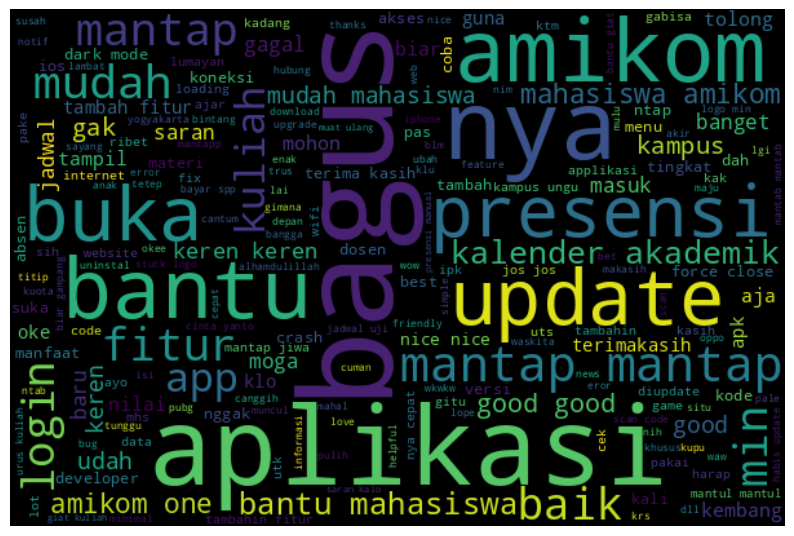

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'all_words_lem' is a string containing your preprocessed words
wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# wordcloud sentimen negatif

In [ ]:
df_neg=df[df['sentiment']==-1] #memfilter kolom sentiment = -1 (negative)
all_words_lemneg = ' '.join([word for word in df_neg['text_string']]) #menggabungkan semua isi kolom text_s

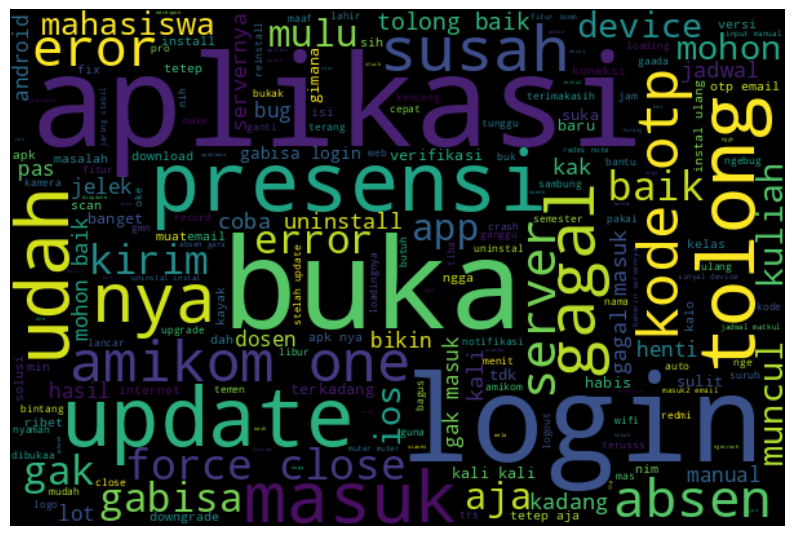

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words_lemneg)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

# wordcloud sentimen netral

In [ ]:
df_net=df[df['sentiment']==0] #memfilter kolom sentiment = 0 (netral)
all_words_lemnet = ' '.join([word for word in df_net['text_string']]) #menggabungkan semua isi kolom text_st

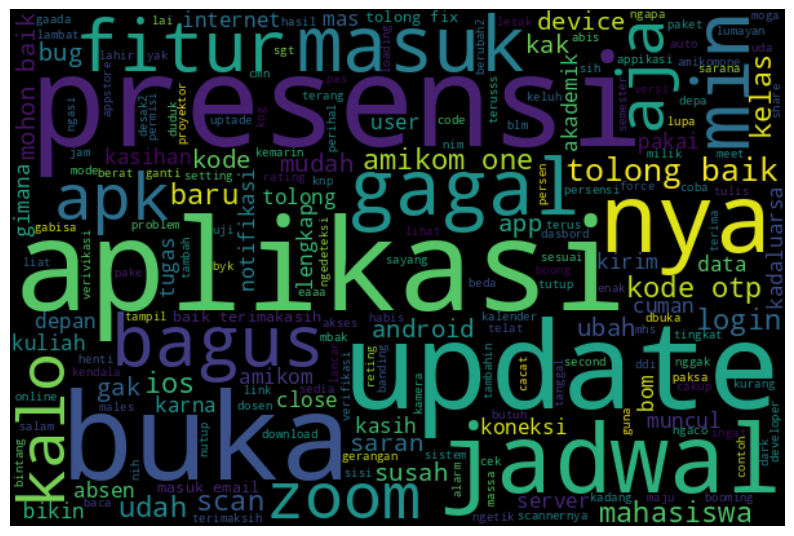

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words_lemnet)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
df['text_string'] #menampilkan kolom text_string

0                        console ngelag udah pakai iphone
1                        console ngelag udah pakai iphone
2                                        bagus cheat pubg
3                                        bagus cheat pubg
4       ditambahin kalender akademik news amikom sinkr...
                              ...                        
1331              kasi fitur zoom scan min kalah ipon min
1332                                           udah bagus
1333                                           udah bagus
1334                                                qduar
1335                                                qduar
Name: text_string, Length: 1336, dtype: object

In [ ]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer


from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics


# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
X = df['text_string'] #X = kolom text_string
y = df['sentiment'] #y = kolom sentiment

#Apply TFIDF

In [ ]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

#Smote IMBALANCE

In [ ]:
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

#Split Data into train & test

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2,random_state=0)

#Random Forest

In [ ]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)

In [ ]:
accuracy_score(random_forest_classifier_prediction,y_test)

0.9685185185185186

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, pred_rfc))

[[166   0   3]
 [  3 186   0]
 [  9   0 173]]


In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

          -1       0.93      0.98      0.96       169
           0       1.00      0.98      0.99       189
           1       0.98      0.95      0.97       182

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [ ]:
X = df.drop('text_string', axis=1)
y = df['sentiment']

Confusion Matrix:
[[166   0   3]
 [  3 186   0]
 [  9   0 173]]


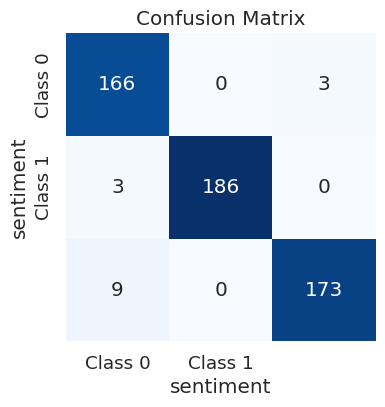

In [ ]:
pred_rfc = rfc.predict(X_test)

# Hitung dan cetak confusion matrix
cm = confusion_matrix(y_test, pred_rfc)
print("Confusion Matrix:")
print(cm)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.xlabel('sentiment')
plt.ylabel('sentiment')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle